Yang Zhang
Ruoxuan Lin

In [2]:
import pandas as pd

In [3]:
#import data
calendar_df = pd.read_csv("calendar.csv")
listings_df = pd.read_csv("listings.csv")
reviews_df = pd.read_csv("reviews.csv")

In [4]:
variables = [
    "host_response_rate", "host_acceptance_rate", "host_listings_count",
    "host_total_listings_count", "accommodates", "bathrooms", "bedrooms", "beds", "price",
    "weekly_price", "monthly_price", "security_deposit", "cleaning_fee", "guests_included",
    "extra_people", "minimum_nights", "maximum_nights", "availability_30", "availability_90",
    "availability_365", "number_of_reviews", "review_scores_rating", "review_scores_accuracy",
    "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication",
    "review_scores_value", "reviews_per_month"
]

# clean data with '$' %' ','
rate_cols = ["host_response_rate","host_acceptance_rate"]
for col in rate_cols:
    listings_df[col] = listings_df[col].astype(str)
    listings_df[col] = listings_df[col].str.replace(',', '',regex=False)
    listings_df[col] = listings_df[col].str.replace('%', '').astype(float)
dollar_cols = ["price", "weekly_price", "monthly_price", "security_deposit", "cleaning_fee", "extra_people"]
for col in dollar_cols:
    listings_df[col] = listings_df[col].astype(str)
    listings_df[col] = listings_df[col].str.replace(',', '',regex=False)
    listings_df[col] = listings_df[col].str.replace('$', '',regex=False).astype(float)

variance = listings_df[variables].var()
desc_stats = listings_df[variables].describe().transpose()[['min', 'max', 'mean', '50%', 'std']]
desc_stats.rename(columns={'50%': 'median'}, inplace=True)

# Merging variance with the descriptive statistics table
desc_stats['variance'] = variance
desc_stats = desc_stats[['min', 'max', 'mean', 'median', 'variance', 'std']]
desc_stats

,min,max,mean,median,variance,std
host_response_rate,0.00,100.00,94.989082,100.00,1.566925e+02,1.251769e+01
host_acceptance_rate,0.00,100.00,84.173089,94.00,4.743359e+02,2.177925e+01
host_listings_count,0.00,749.00,58.902371,2.00,2.928194e+04,1.711197e+02
host_total_listings_count,0.00,749.00,58.902371,2.00,2.928194e+04,1.711197e+02
accommodates,1.00,16.00,3.041283,2.00,3.164590e+00,1.778929e+00
bathrooms,0.00,6.00,1.221647,1.00,2.514893e-01,5.014871e-01
bedrooms,0.00,5.00,1.255944,1.00,5.670988e-01,7.530596e-01
beds,0.00,16.00,1.609060,1.00,1.023627e+00,1.011745e+00
price,10.00,4000.00,173.925802,150.00,2.200218e+04,1.483313e+02
weekly_price,80.00,5000.00,922.392377,750.00,4.327295e+05,6.578218e+02


Yes, for maximum_night there exist outliers. Number of maximum_night with 99999999 is strange.
Some of data have very high Variance, for example 'host_listings_count', 'host_total_listings_count','price','monthly_price','weekly_price','security_deposit','availability_365'. There variance is higher than 10e+4. higher variance can also caused by outliers.

Qeustion2

In [7]:
#code from blackboard with modify
import nltk
nltk.download('punkt')
nltk.download('vader_lexicon')
#from textblob import TextBlob
import pandas as pd
import numpy as np
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import tokenize

sentiment_analysis_columns = ['negativity', 'neutrality', 'positivity', 'compound']

file_names = ["reviews"]

sid = SentimentIntensityAnalyzer()

for i in range(len(file_names)):
    expanded_text_dataset = []
    file_name = file_names[i]
    print('Sentiment analysis for: %s' %file_name)
    file_df = pd.read_csv('%s.csv' % file_name) #change to csv
    column_names = list(file_df.columns.values)
    all_columns = column_names + sentiment_analysis_columns
    text_segment_list = list(file_df['comments']) #change colum we want
    for j in range(len(text_segment_list)):
        row_info = list(file_df.iloc[j])
        text = text_segment_list[j]
        ##Sentiment analysis
        try:
            ss = sid.polarity_scores(text)
            negativity = ss['neg']
            neutrality = ss['neu']
            positivity = ss['pos']
            compound = ss['compound']
            temp_data = row_info + [negativity, neutrality, positivity, compound]
            expanded_text_dataset.append(temp_data)
        except:
            print('Sentiment analysis not done: ' + str(i) + ' / ' + str(len(file_df)))
            temp_data = row_info + ['NA', 'NA', 'NA', 'NA']
            expanded_text_dataset.append(temp_data)
    ##Storing the results in a dataset
    sentiment_dataset_df = pd.DataFrame(expanded_text_dataset, columns = all_columns)
    sentiment_dataset_df.to_csv('%s_sentiment_analysis.csv' %file_name) #change out put to csv file

[nltk_data] Downloading package punkt to
[nltk_data]     /home/5b9f0f86-12c5-4839-9e6f-
[nltk_data]     8cda750ad2f0/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/5b9f0f86-12c5-4839-9e6f-
[nltk_data]     8cda750ad2f0/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Sentiment analysis for: reviews
Sentiment analysis not done: 0 / 68275
Sentiment analysis not done: 0 / 68275
Sentiment analysis not done: 0 / 68275
Sentiment analysis not done: 0 / 68275
Sentiment analysis not done: 0 / 68275
Sentiment analysis not done: 0 / 68275
Sentiment analysis not done: 0 / 68275
Sentiment analysis not done: 0 / 68275
Sentiment analysis not done: 0 / 68275
Sentiment analysis not done: 0 / 68275
Sentiment analysis not done: 0 / 68275
Sentiment analysis not done: 0 / 68275
Sentiment analysis not done: 0 / 68275
Sentiment analysis not done: 0 / 68275
Sentiment analysis not done: 0 / 68275
Sentiment analysis not done: 0 / 68275
Sentiment analysis not done: 0 / 68275
Sentiment analysis not done: 0 / 68275
Sentiment analysis not done: 0 / 68275
Sentiment analysis not done: 0 / 68275
Sentiment analysis not done: 0 / 68275
Sentiment analysis not done: 0 / 68275
Sentiment analysis not done: 0 / 68275
Sentiment analysis not done: 0 / 68275
Sentiment analysis not done: 0 /

In [8]:
negative_words = pd.read_csv("negative_words.csv",encoding="ISO-8859-1")
positive_words = pd.read_csv("positive_words.csv")

# Convert the word lists to sets for faster lookup
positive_word_set = set(positive_words.iloc[:, 0])
negative_word_set = set(negative_words.iloc[:, 0])

# Initialize 
positivity_simple = []
negativity_simple = []

# Iterate over each comment
for comment in reviews_df['comments']:
    #skip NA
    if pd.isna(comment):
        positivity_simple.append(None)
        negativity_simple.append(None)
        continue
        
    # split sentens
    words = comment.split()
    positive_count = 0 
    negative_count = 0
    
    # add Count total
    total_words = len(words)  
    for word in words:
        #add positive
        if word in positive_word_set:
            positive_count += 1
        #add negative
        elif word in negative_word_set:
            negative_count += 1

    if total_words > 0:
        # Calculate positivity_simple and negativity_simple
        pos_simple = positive_count / total_words 
        neg_simple = negative_count / total_words 
    else:
        pos_simple = 0
        neg_simple = 0
        
    
    positivity_simple.append(pos_simple)
    negativity_simple.append(neg_simple)

# Add the values to the reviews_df
reviews_df['positivity_simple'] = positivity_simple
reviews_df['negativity_simple'] = negativity_simple

reviews_df.head()


,listing_id,id,date,reviewer_id,reviewer_name,comments,positivity_simple,negativity_simple
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...,0.040816,0.000000
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...,0.083333,0.000000
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...,0.034884,0.023256
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...,0.111111,0.000000
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...,0.000000,0.000000


Question 3

In [10]:
sentiment_analysis_df = pd.read_csv("reviews_sentiment_analysis.csv")
# group by listing id
grouped_means_simple = reviews_df.groupby('listing_id')[['positivity_simple', 'negativity_simple']].mean()
grouped_means = sentiment_analysis_df.groupby('listing_id')[["negativity", "neutrality", "positivity", "compound"]].mean()
# merge
listings_df = listings_df.merge(grouped_means, on='listing_id', how = 'left')
listings_df = listings_df.merge(grouped_means_simple, on='listing_id', how = 'left')

listings_df.rename(columns={'positivity_simple': 'positivity_simple_mean', 
                            'negativity_simple': 'negativity_simple_mean',
                            'negativity': 'negativity_mean',
                            'neutrality': 'neutrality_mean',
                            'positivity': 'positivity_mean',
                            'compound': 'compound_mean',
                            }, inplace=True)
listings_df.head()

,listing_id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,negativity_mean,neutrality_mean,positivity_mean,compound_mean,positivity_simple_mean,negativity_simple_mean
0,12147973,https://www.airbnb.com/rooms/12147973,2.020000e+13,9/7/16,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,f,f,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,2.020000e+13,9/7/16,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,f,f,1,1.30,0.014000,0.664056,0.321944,0.837644,0.085016,0.005188
2,6976,https://www.airbnb.com/rooms/6976,2.020000e+13,9/7/16,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,t,f,1,0.47,0.010854,0.724488,0.264659,0.905349,0.078709,0.001326
3,1436513,https://www.airbnb.com/rooms/1436513,2.020000e+13,9/7/16,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,f,f,1,1.00,0.000000,0.516000,0.484000,0.950600,0.041667,0.000000
4,7651065,https://www.airbnb.com/rooms/7651065,2.020000e+13,9/7/16,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,f,f,1,2.25,0.017034,0.709069,0.273897,0.780959,0.084973,0.003509


Question 4

In [12]:
import mlxtend 
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [13]:
selected_columns = listings_df[['property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms']]

# we want to distinct 1 bathromm and 1 bedroom 
encoded_df = pd.get_dummies(selected_columns, columns=selected_columns.columns, prefix_sep='')

#MinSup = 0.1
frequent_itemsets = apriori(encoded_df, min_support=0.1, use_colnames=True)
frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)

top_5 = frequent_itemsets.head(5)
bottom_5 = frequent_itemsets.tail(5)
print(top_5)
print(bottom_5)


     support                                itemsets
8   0.767364                          (bathrooms1.0)
0   0.728591                (property_typeApartment)
10  0.663598                           (bedrooms1.0)
16  0.597768  (bathrooms1.0, property_typeApartment)
2   0.593305              (room_typeEntire home/apt)
     support                                           itemsets
56  0.102929  (room_typePrivate room, accommodates1, bedroom...
27  0.102929             (room_typePrivate room, accommodates1)
24  0.101255           (bathrooms2.0, room_typeEntire home/apt)
55  0.100418  (bathrooms1.0, room_typeEntire home/apt, bedro...
37  0.100418                        (bathrooms1.0, bedrooms2.0)


/home/5b9f0f86-12c5-4839-9e6f-8cda750ad2f0/.local/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [14]:
#minSup = 0.2
frequent_itemsets = apriori(encoded_df, min_support=0.2, use_colnames=True)
frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)

top_5 = frequent_itemsets.head(5)
bottom_5 = frequent_itemsets.tail(5)
print(top_5)
print(bottom_5)


    support                                itemsets
4  0.767364                          (bathrooms1.0)
0  0.728591                (property_typeApartment)
5  0.663598                           (bedrooms1.0)
9  0.597768  (bathrooms1.0, property_typeApartment)
1  0.593305              (room_typeEntire home/apt)
     support                                           itemsets
20  0.225105  (bedrooms1.0, room_typeEntire home/apt, proper...
21  0.219247  (bedrooms1.0, property_typeApartment, room_typ...
7   0.219247    (room_typePrivate room, property_typeApartment)
29  0.217573  (bedrooms1.0, bathrooms1.0, room_typeEntire ho...
30  0.216179  (accommodates2, bathrooms1.0, bedrooms1.0, pro...


/home/5b9f0f86-12c5-4839-9e6f-8cda750ad2f0/.local/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Question 5

In [16]:
def candidates(fre_itemsets, k):
    "Generate candidate k-itemsets from frequent k-1-itemsets."
    candidates = []
    items = fre_itemsets['itemset'].tolist()
    
    for i in range(len(items)):
        for j in range(i+1, len(items)):
            # Merge two itemsets if their first k-1 items are the same
            merged = sorted(set(items[i]).union(set(items[j])))
            if len(merged) == k and merged not in candidates:
                candidates.append(merged)
    return candidates

def apriori_hand(minSup):
    # itemsets and supports
    itemsets = []
    supports = []

    # Loop through each column in the encoded_df
    for column in encoded_df.columns:
        sup = encoded_df[column].mean()
        if sup >= minSup:
            itemsets.append([column])  
            supports.append(sup)

    # Convert these lists to a dataframe
    freq_1_itemsets= pd.DataFrame({
        'itemset': itemsets,
        'support': supports
    })

    all_freq_itemsets = [freq_1_itemsets]
    k = 2

    while True:
        # Generate candidate k-itemsets
        #
        candidates_k_itemsets = candidates(all_freq_itemsets[-1], k)

        # Calculate the support for each candidate k-itemset
        sup_k_itemsets = []
        for itemset in candidates_k_itemsets:
            sup = encoded_df[list(itemset)].all(axis=1).mean()
            sup_k_itemsets.append((itemset, sup))

        # Filter candidates that meet the minimum support threshold
        freq_k_itemsets = pd.DataFrame(sup_k_itemsets, columns=['itemset', 'support'])
        freq_k_itemsets = freq_k_itemsets[freq_k_itemsets['support'] >= minSup]

        # If no more frequent itemsets, break
        if freq_k_itemsets.empty:
            break

        all_freq_itemsets.append(freq_k_itemsets)
        k += 1
    return all_freq_itemsets

# covert result to dataframe
print('minSup 0.1')
freq_itemsets_df_1 = pd.concat(apriori_hand(0.1), ignore_index=True)
freq_itemsets_df_1= freq_itemsets_df_1.sort_values(by='support', ascending=False)
print(freq_itemsets_df_1.head(5))
print(freq_itemsets_df_1.tail(5))

print('minSup 0.2')
freq_itemsets_df_2 = pd.concat(apriori_hand(0.2), ignore_index=True)
freq_itemsets_df_2= freq_itemsets_df_2.sort_values(by='support', ascending=False)
print(freq_itemsets_df_2.head(5))
print(freq_itemsets_df_2.tail(5))

minSup 0.1
                                   itemset   support
8                           [bathrooms1.0]  0.767364
0                 [property_typeApartment]  0.728591
10                           [bedrooms1.0]  0.663598
16  [bathrooms1.0, property_typeApartment]  0.597768
2               [room_typeEntire home/apt]  0.593305
                                              itemset   support
56  [accommodates1, bedrooms1.0, room_typePrivate ...  0.102929
27             [accommodates1, room_typePrivate room]  0.102929
24           [bathrooms2.0, room_typeEntire home/apt]  0.101255
55  [bathrooms1.0, bedrooms2.0, room_typeEntire ho...  0.100418
37                        [bathrooms1.0, bedrooms2.0]  0.100418
minSup 0.2
                                  itemset   support
4                          [bathrooms1.0]  0.767364
0                [property_typeApartment]  0.728591
5                           [bedrooms1.0]  0.663598
9  [bathrooms1.0, property_typeApartment]  0.597768
1              [

Question 6

In [18]:
import statsmodels.api as sm
X_columns_final = [
    'host_response_rate', 'review_scores_rating', 'review_scores_accuracy',
    'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
    'negativity_mean', 'positivity_mean', 'positivity_simple_mean', 'negativity_simple_mean'
]

X = listings_df[X_columns_final]
y = listings_df['price']

# model needs an intercept so we add a constant
X = sm.add_constant(X)
# Handle missing values by dropping them
X = X.dropna()
y = y[X.index]

#fit OLS
model = sm.OLS(y, X).fit()

# Display the model summary
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     9.750
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           3.73e-16
Time:                        22:16:02   Log-Likelihood:                -15524.
No. Observations:                2543   AIC:                         3.107e+04
Df Residuals:                    2532   BIC:                         3.114e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         168.6034     38.522      4.377      0.000      93.065     244.142
host_response_rate             -0.0941      0.204     -0.462      0.644      -0.493       0.305
review_scores_rating            1.6896      0.468      3.607      0.000       0.771       2.608
review_scores_accuracy        -13.5909      3.484     -3.901      0.000     -20.422      -6.760
review_scores_cleanliness      17.2095      3.026      5.687      0.000      11.275      23.144
review_scores_checkin         -13.4661      4.115     -3.272      0.001     -21.535      -5.397
review_scores_communication    -6.0077      4.338     -1.385      0.166     -14.514       2.498
negativity_mean               -28.2229    129.552     -0.218      0.828    -282.261     225.815
positivity_mean                21.2618     35.271      0.603      0.547     -47.902      90.425
positivity_simple_mean        -14.9896     93.053     -0.161      0.872    -197.457     167.478
negativity_simple_mean        936.4360    453.959      2.063      0.039      46.267    1826.605
==============================================================================
Omnibus:                     1228.613   Durbin-Watson:                   1.525
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10509.741
Skew:                           2.104   Prob(JB):                         0.00
Kurtosis:                      12.027   Cond. No.                     2.86e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.86e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


X = listings_df[X_columns_final].copy()
y = listings_df['price']
#drop missing value
X = X.dropna()
y = y[X.index].dropna()

#Standardize the values 
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

#Apply PCA 
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_standardized)


X_pca_sm = sm.add_constant(X_pca)  # Add a constant for the OLS model
model_pca = sm.OLS(y, X_pca_sm).fit()
model_pca.summary()





<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.805
Date:                Mon, 16 Oct 2023   Prob (F-statistic):             0.0384
Time:                        22:16:02   Log-Likelihood:                -15568.
No. Observations:                2543   AIC:                         3.114e+04
Df Residuals:                    2539   BIC:                         3.117e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        167.3921      2.189     76.481      0.000     163.100     171.684
x1            -3.1244      1.093     -2.858      0.004      -5.268      -0.981
x2            -0.6452      1.801     -0.358      0.720      -4.177       2.886
x3             0.7285      2.119      0.344      0.731      -3.427       4.884
==============================================================================
Omnibus:                     1178.910   Durbin-Watson:                   1.454
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9156.097
Skew:                           2.033   Prob(JB):                         0.00
Kurtosis:                      11.360   Cond. No.                         2.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

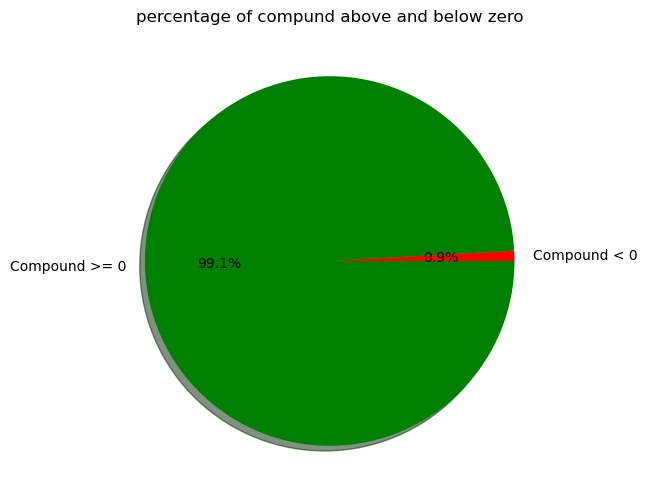

In [20]:
import matplotlib.pyplot as plt
pos_percentage = (listings_df['compound_mean'] < 0).mean() * 100
neg_percentage = (listings_df['compound_mean'] >= 0).mean() * 100

# Create a pie chart
labels = ['Compound < 0', 'Compound >= 0']
sizes = [pos_percentage, neg_percentage]
colors = ['red', 'green']

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.title('percentage of compund above and below zero')

# Display the chart
plt.show()


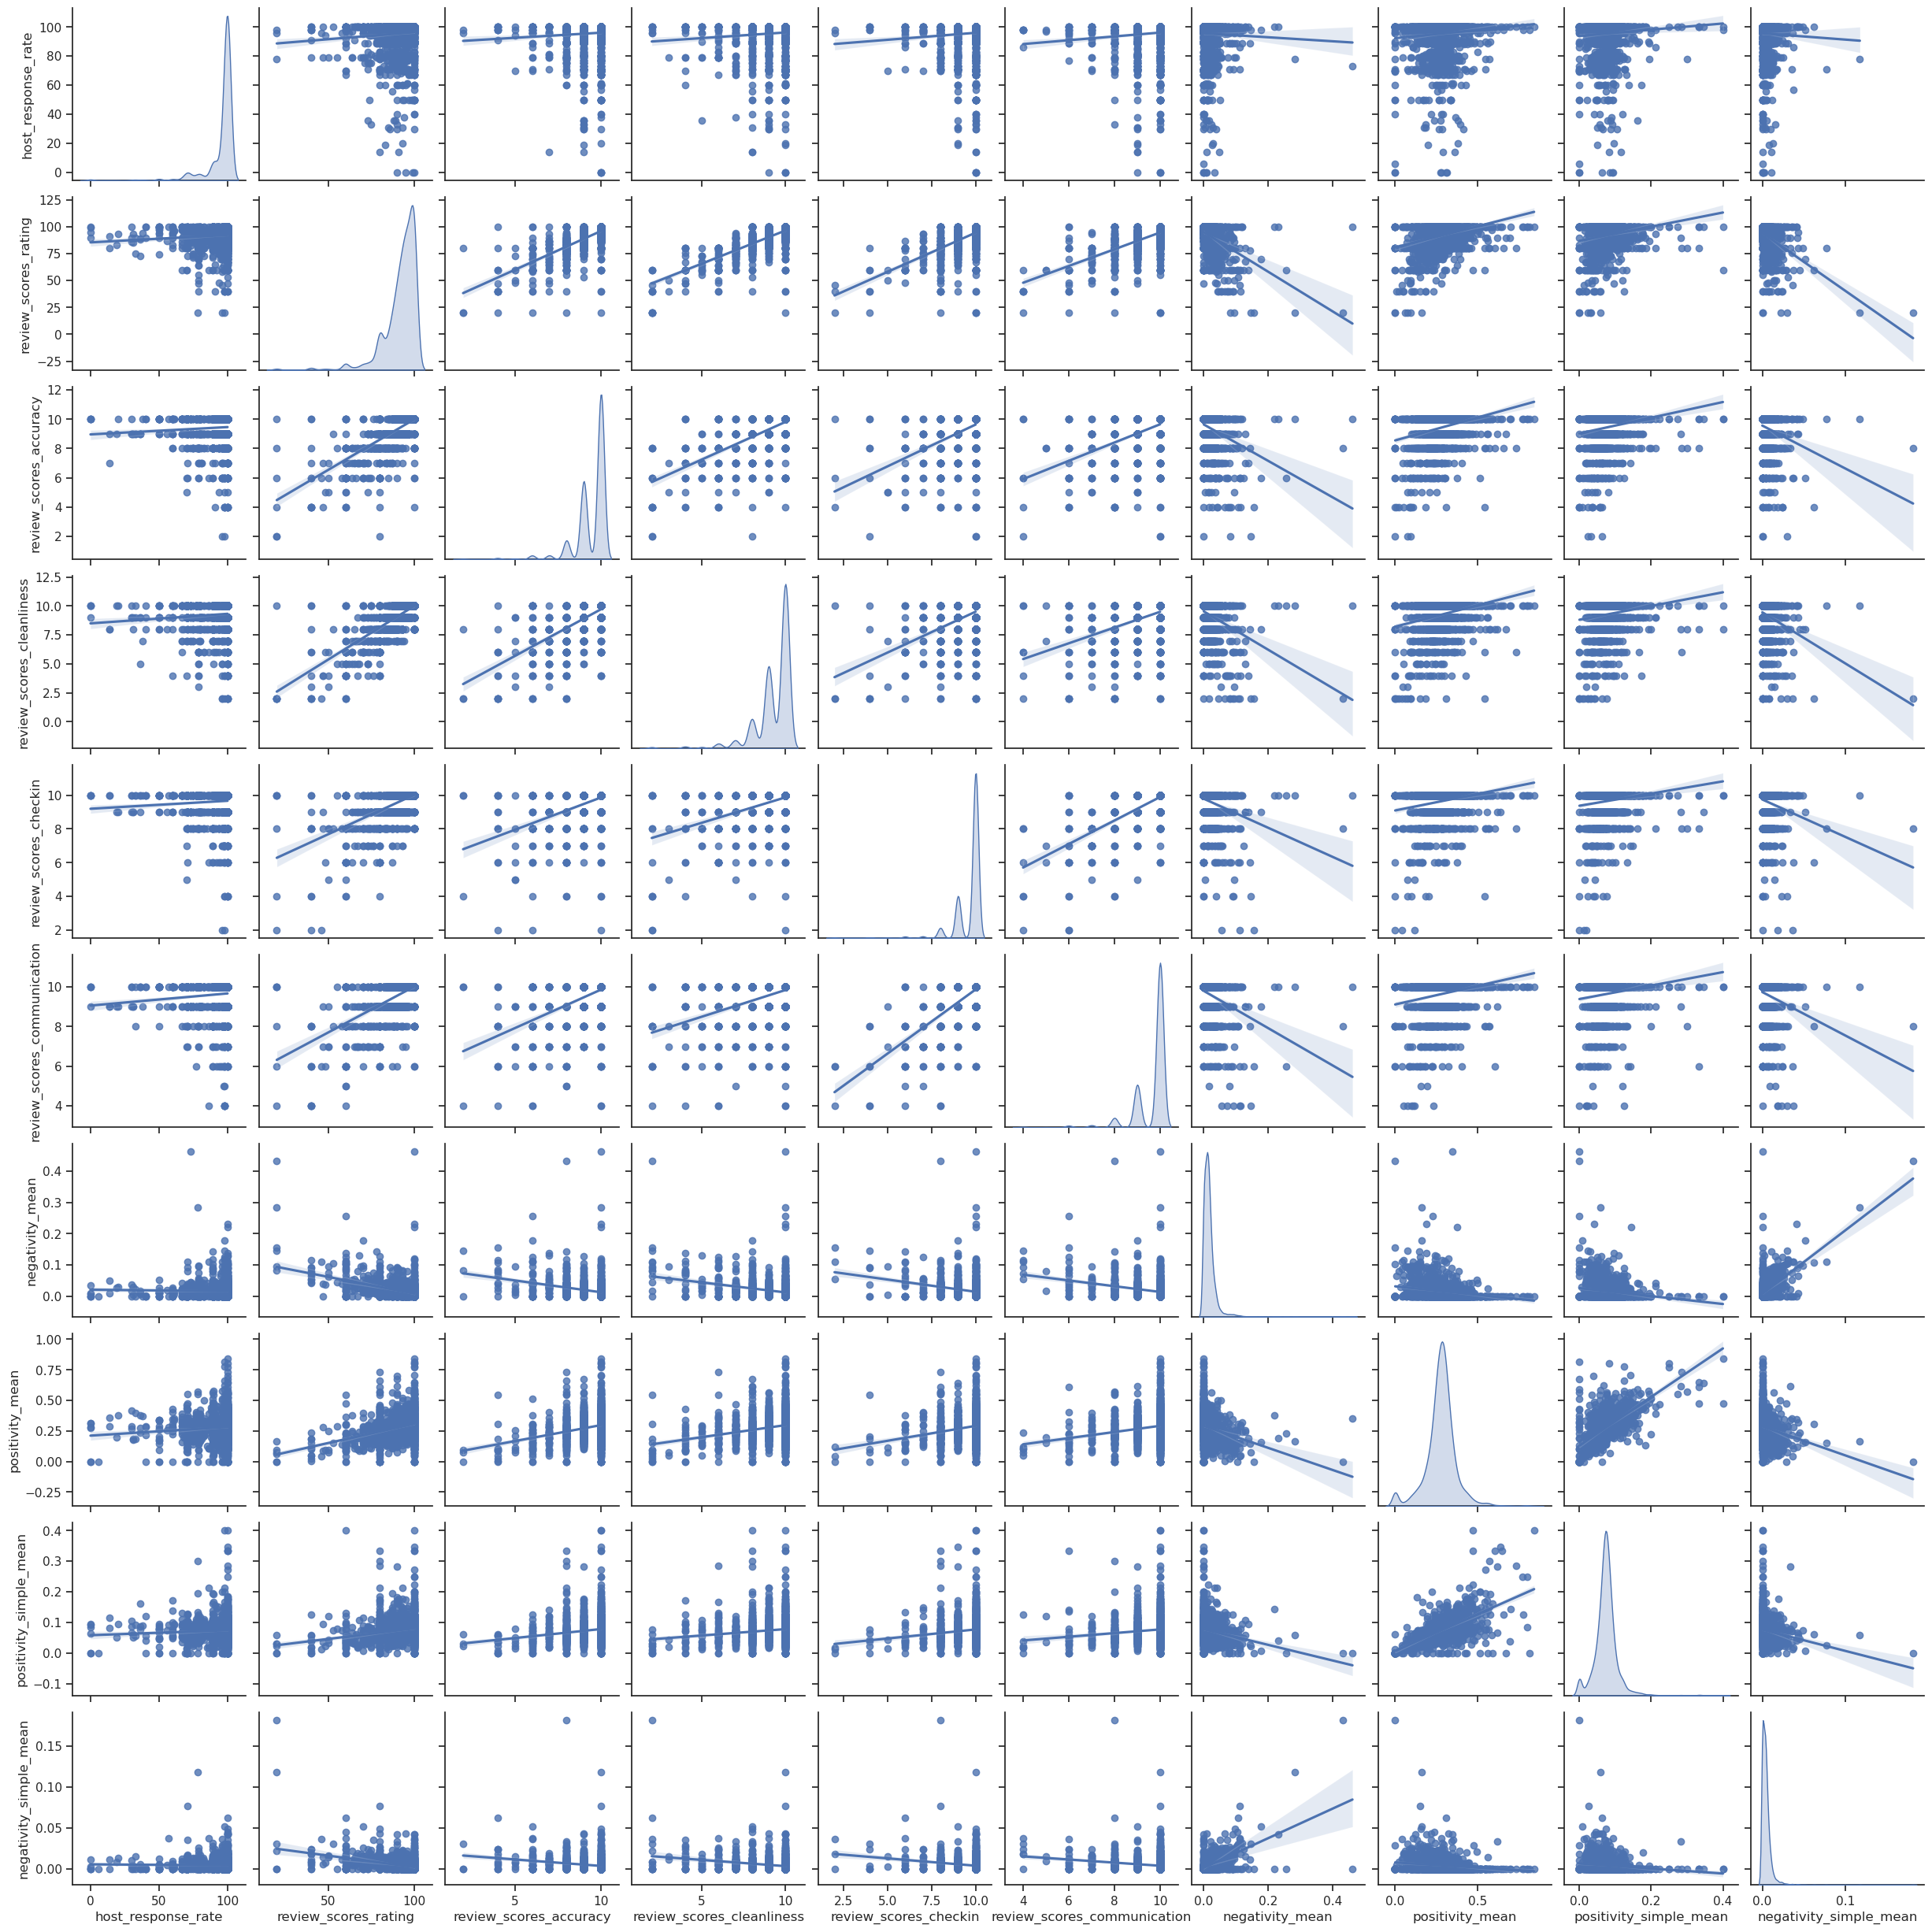

In [21]:
import seaborn as sns

numerical_vars = X_columns_final  

# Subset the DataFrame to include only the selected numerical variables
subset_df = listings_df[numerical_vars]

# Create a pairplot with trend lines
sns.set(style="ticks", color_codes=True)
sns.pairplot(subset_df, kind="reg", diag_kind="kde")

# Display the plot
plt.show()

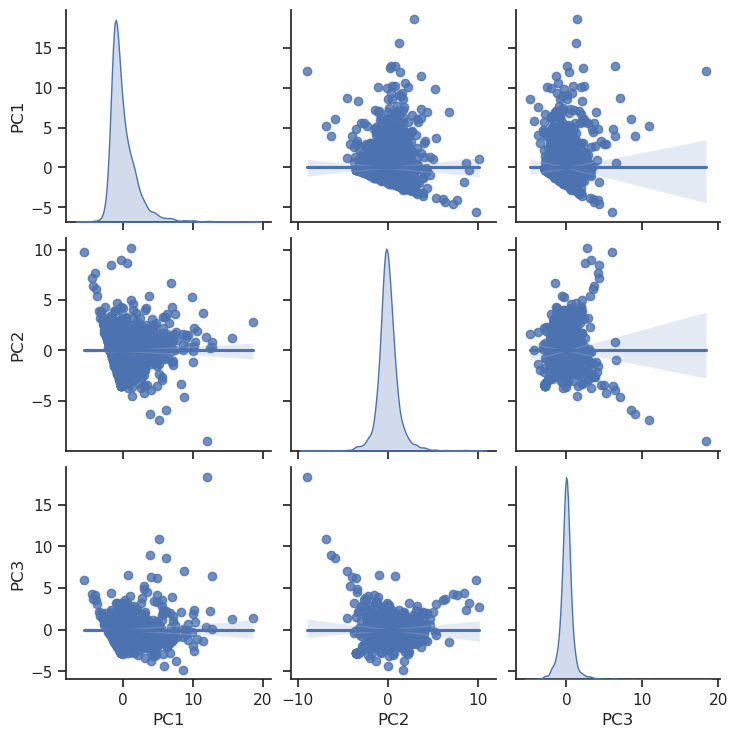

In [22]:
X_pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])

# Create a pairplot with trend lines
sns.set(style="ticks", color_codes=True)
sns.pairplot(X_pca_df, kind="reg", diag_kind="kde")

plt.show()

In [23]:
# Create a DataFrame to store the regression summary
regression_summary = pd.DataFrame(columns=['Variable', 'Coefficient', 'Standard Error', 't-statistic', 'p-value'])

# Extract information
variables = model.params.index  # Get variable names
coefficients = model.params.values
std_errors = model.bse.values
t_statistics = model.tvalues.values
p_values = model.pvalues.values

# put data in regression_summary
regression_summary['Variable'] = variables
regression_summary['Coefficient'] = coefficients
regression_summary['Standard Error'] = std_errors
regression_summary['t-statistic'] = t_statistics
regression_summary['p-value'] = p_values

# Ad R-squared, number of observations, and degrees of freedom
regression_summary.loc['R-squared'] = [model.rsquared, '', '', '', '']
regression_summary.loc['Number of Observations'] = [model.nobs, '', '', '', '']
regression_summary.loc['Degrees of Freedom (DF)'] = [model.df_model, '', '', '', '']


print(regression_summary)


                                            Variable Coefficient  \
0                                              const  168.603368   
1                                 host_response_rate   -0.094118   
2                               review_scores_rating     1.68957   
3                             review_scores_accuracy  -13.590939   
4                          review_scores_cleanliness   17.209475   
5                              review_scores_checkin  -13.466098   
6                        review_scores_communication   -6.007696   
7                                    negativity_mean  -28.222907   
8                                    positivity_mean   21.261827   
9                             positivity_simple_mean  -14.989616   
10                            negativity_simple_mean  936.436043   
R-squared                                   0.037078               
Number of Observations                        2543.0               
Degrees of Freedom (DF)                         

In [24]:
# Create a DataFrame to store the regression summary
regression_summary_pca = pd.DataFrame(columns=['Variable', 'Coefficient', 'Standard Error', 't-statistic', 'p-value'])

# Extract information
variables = model_pca.params.index  # Get variable names
coefficients = model_pca.params.values
std_errors =model_pca.bse.values
t_statistics = model_pca.tvalues.values
p_values = model_pca.pvalues.values

# put data in regression_summary
regression_summary_pca['Variable'] = variables
regression_summary_pca['Coefficient'] = coefficients
regression_summary_pca['Standard Error'] = std_errors
regression_summary_pca['t-statistic'] = t_statistics
regression_summary_pca['p-value'] = p_values

# Add R-squared, number of observations, and degrees of freedom
regression_summary_pca.loc['R-squared'] = [model_pca.rsquared, '', '', '', '']
regression_summary_pca.loc['Number of Observations'] = [model_pca.nobs, '', '', '', '']
regression_summary_pca.loc['Degrees of Freedom (DF)'] = [model_pca.df_model, '', '', '', '']

print(regression_summary_pca)

                         Variable Coefficient Standard Error t-statistic  \
0                           const  167.392057       2.188674   76.481027   
1                              x1   -3.124359       1.093271   -2.857807   
2                              x2   -0.645199       1.800895   -0.358266   
3                              x3    0.728508       2.119296     0.34375   
R-squared                0.003303                                          
Number of Observations     2543.0                                          
Degrees of Freedom (DF)       3.0                                          

                          p-value  
0                             0.0  
1                        0.004301  
2                        0.720174  
3                        0.731063  
R-squared                          
Number of Observations             
Degrees of Freedom (DF)            
